### Import module

In [1]:
import os
from PIL import Image, ImageEnhance
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd


[64.21068987183583, 18.043643986617006, 38.128204125324984, 37.36766222158927, 38.484565037144726, 112.61217445879296, 163.08818236942955, 44.385999260859656, -16.31473093467818, 36.0083709908171, -13.408147717396488, 101.30625323876626, 9.443824960992444, 82.69916497173091, 95.95447209420823, 22.569425376162222, 58.3510467112215, 92.8066935801834, 80.55851263846095, 45.48718077150789, 48.71448188570092, 58.74825000960887, 139.09144588697924, 39.41400905959465, 14.905035357255649, 33.09781502748544, -12.345540854096981, 62.63162785141372, 71.27617718360747, 9.874002828047082, 34.27758466485108, 9.211305142070906, 135.35714556853907, 143.6743305257728, 36.147162117721635, 79.06809842318546, -15.612119624577076, 36.26268522138696, -9.499185750593668, 39.972681497542595, 71.11302264882765, 75.58039665493935, 99.93413287099236, 136.18716115711456, 74.20117123872964, 183.87925229854915, 168.5568618875651, 89.64921927224663, 55.64800596194894, 40.811043949156556, 1.2252967075906085, 238.2802

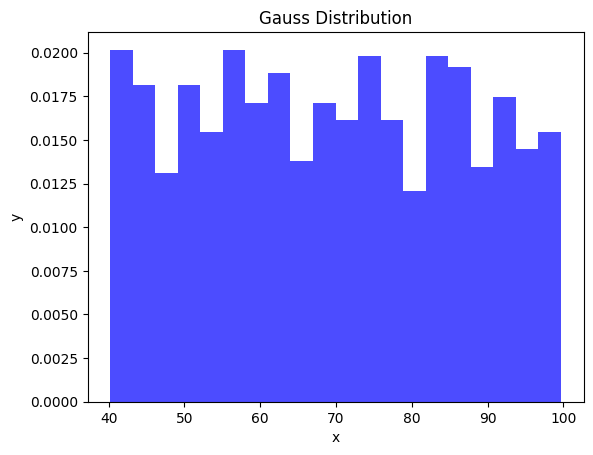

In [2]:
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

mean = 60
stdev = 50

rgaus = [rnd.gauss(mean, stdev) for i in range(1000)]
runiv = [rnd.uniform(40,100) for i in range (1000)]
print(rgaus)
#membuat histogtam
plt.hist(runiv, bins=20, density=True, alpha=0.7, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gauss Distribution')
plt.show()

### Load data

In [13]:
import random
def factor_activity(n):
  numbers = []
  for _ in range(n):
    numbers.append(random.choice([1.2, 1.375, 1.55, 1.725]))
  return numbers

def calculate_bmr(row):
  age = row['usia']
  weight = row['berat badan']
  height = row['tinggi badan']
  activity_factor = random.choice([1.2, 1.375, 1.55, 1.725])

  # Calculate BMR using Mifflin-St Jeor equation (for adults)
  bmr = 10 * weight + 6.25 * height - 5 * age + 5 
  # Apply activity factor to get daily caloric needs
  daily_calories = bmr * activity_factor

  return f'{daily_calories:0.2f}'



n = 100
data = {'usia': np.random.randint(15,60,n),
        'berat badan' : np.random.uniform(40,100,n),
        'tinggi badan' : np.random.uniform(140, 190, n),
        'factor activity ' : factor_activity(n)}

df2 = pd.DataFrame(data)

df2['bmr'] = df2.apply(calculate_bmr, axis=1) 


df2.head()

,usia,berat badan,tinggi badan,factor activity,bmr
0,52,88.162962,147.257558,1.725,2127.11
1,35,91.903721,164.558757,1.725,2133.04
2,59,44.838419,140.795112,1.725,1609.45
3,43,51.888766,168.327120,1.725,1871.28
4,21,62.953621,162.824978,1.375,2127.39


Hitung Ratio Karbo, Protein, Lemak

Karbohidrat: 45-65% dari total kalori. (dibagi 4)

Protein: 10-35% dari total kalori. (dibagi 4)

Lemak: 20-35% dari total kalori. (dibagi 9)

Jika Anda membutuhkan 2000 kalori per hari, maka:

Karbohidrat: 2000 kalori x 0.45 = 900 kalori (900 kalori / 4 kalori/gram = 225 gram karbohidrat)

Protein: 2000 kalori x 0.25 = 500 kalori (500 kalori / 4 kalori/gram = 125 gram protein)

Lemak: 2000 kalori x 0.3 = 600 kalori (600 kalori / 9 kalori/gram = 67 gram lemak)

In [15]:
df2['bmr'] = pd.to_numeric(df2['bmr'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   usia              100 non-null    int32  
 1   berat badan       100 non-null    float64
 2   tinggi badan      100 non-null    float64
 3   factor activity   100 non-null    float64
 4   bmr               100 non-null    float64
dtypes: float64(4), int32(1)
memory usage: 3.6 KB


In [16]:
print(df2['bmr'].dtype)

float64


In [17]:
def karbo(row):
    bmr = row['bmr']
    karb_min = (bmr*0.65)/4
    return f'{karb_min:0.2f}'

def protein(row):
    bmr = row['bmr']
    prot_min = (bmr*0.35)/4
    return f'{prot_min:0.2f}'

def lemak(row):
    bmr = row['bmr']
    lem_min = (bmr*0.35)/9
    return f'{lem_min:0.2f}'

df2['karbo_minimum'] = df2.apply(karbo, axis=1)
df2['protein_minimum'] = df2.apply(protein, axis=1)
df2['lemak_minimum'] = df2.apply(lemak, axis=1)

df2.head()

,usia,berat badan,tinggi badan,factor activity,bmr,karbo_minimum,protein_minimum,lemak_minimum
0,52,88.162962,147.257558,1.725,2127.11,345.66,186.12,82.72
1,35,91.903721,164.558757,1.725,2133.04,346.62,186.64,82.95
2,59,44.838419,140.795112,1.725,1609.45,261.54,140.83,62.59
3,43,51.888766,168.327120,1.725,1871.28,304.08,163.74,72.77
4,21,62.953621,162.824978,1.375,2127.39,345.70,186.15,82.73


In [146]:
df = pd.read_csv('D:\\S2\\Smt 1\\Metodologi Penelitian\\database\\basis data new.csv')

In [196]:
df.head(15)

,No,Nama_Makanan,Jenis_makanan,Size,Kalori,Lemak,Karbohidrat,Protein
0,1,Indomie goreng,Makanan,80.0,350.0,12.0,52.0,8.0
1,2,Pop Mie,Makanan,75.0,350.0,15.0,47.0,6.0
2,3,Chitato Lite,Snack,18.0,80.0,4.5,8.0,1.0
3,4,Qtela,Snack,20.0,100.0,5.0,14.0,0.0
4,5,Nissin Crispy Crackers,Snack,30.0,150.0,6.0,21.0,2.0
5,6,Pringles,Snack,25.0,130.0,8.0,14.0,2.0
6,7,Good Time,Snack,18.0,90.0,3.5,13.0,1.0
7,8,Beng Beng,Snack,20.0,100.0,5.0,13.0,1.0
8,9,Tango,Snack,25.0,120.0,6.0,16.0,1.0
9,10,Silver Queen,Snack,30.0,170.0,11.0,14.0,4.0


In [148]:
df.head()

,No,Nama_Makanan,Jenis_makanan,Size,Kalori,Lemak,Karbohidrat,Protein
0,1,Indomie goreng,Makanan,80.0,350.0,12.0,52.0,8.0
1,2,Pop Mie,Makanan,75.0,350.0,15.0,47.0,6.0
2,3,Chitato Lite,Snack,18.0,80.0,4.5,8.0,1.0
3,4,Qtela,Snack,20.0,100.0,5.0,14.0,0.0
4,5,Nissin Crispy Crackers,Snack,30.0,150.0,6.0,21.0,2.0


In [149]:
jenis_makanan = df['Jenis_makanan'].value_counts()
print(jenis_makanan)

Jenis_makanan
Snack      26
Makanan     7
Minuman     3
Name: count, dtype: int64


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             36 non-null     int64  
 1   Nama_Makanan   36 non-null     object 
 2   Jenis_makanan  36 non-null     object 
 3   Size           36 non-null     float64
 4   Kalori         36 non-null     float64
 5   Lemak          36 non-null     float64
 6   Karbohidrat    36 non-null     float64
 7   Protein        36 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.4+ KB


### Visualisasi

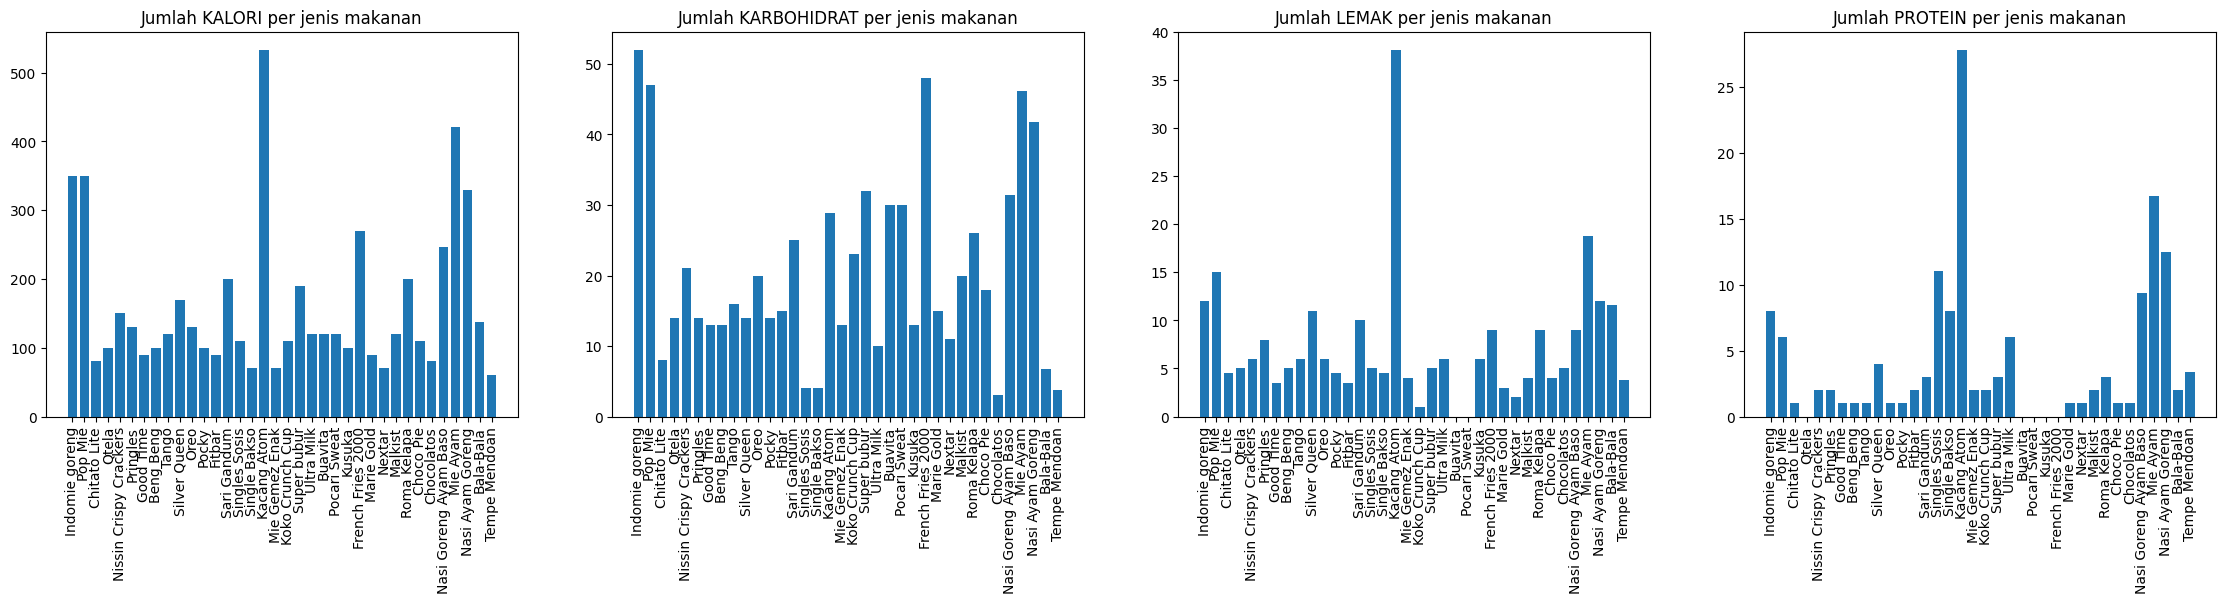

In [151]:
y = df['Kalori']
y1 = df['Karbohidrat']
y2 = df['Lemak']
y3 = df['Protein']
x = df['Nama_Makanan']

plt.figure(figsize=(28,5))

plt.subplot(1, 4, 1)  # 1 baris, 4 kolom, subplot ke-1
plt.bar(x,y)
plt.title("Jumlah KALORI per jenis makanan")
plt.xticks(rotation=90)

plt.subplot(1, 4, 2) 
plt.bar(x,y1)
plt.title("Jumlah KARBOHIDRAT per jenis makanan")
plt.xticks(rotation=90)



plt.subplot(1, 4, 3) 
plt.bar(x,y2)
plt.title("Jumlah LEMAK per jenis makanan")
plt.xticks(rotation=90)

plt.subplot(1, 4, 4) 
plt.bar(x,y3)
plt.title("Jumlah PROTEIN per jenis makanan")
plt.xticks(rotation=90)

plt.show()

In [152]:
x = df.columns[2] #kalori
x1 = df.columns[4] #karbo
x2 = df.columns[5] #prot
x3 = df.columns[3] #lemak


### Pengujian

In [25]:
#Search kata

kalori = []
hasil = []
nama_makanan = input("Masukan nama makanan yang kamu makan:")
hasil_pencarian = df[df['Nama_Makanan'].str.contains(nama_makanan, case=False)]
k = hasil_pencarian['Kalori'].astype(float)
kalori.append(k)
hasil.append(hasil_pencarian['Nama_Makanan'].values)

nama_makanan1 = input("Masukan nama makanan yang kamu makan:")
hasil_pencarian = df[df['Nama_Makanan'].str.contains(nama_makanan1, case=False)]
k1 = hasil_pencarian['Kalori'].astype(float)
kalori.append(k1)
hasil.append(hasil_pencarian['Nama_Makanan'].values)


#jumlahkan kalori yang sudah dimasukan
print("makanan yang makan", hasil)
print("jumlah kalori terkumpul", np.sum(kalori))



makanan yang makan [array(['Oreo'], dtype=object), array(['Oreo'], dtype=object)]
jumlah kalori terkumpul 260.0


In [ ]:
jumlah=int(input("jumlah makanan yang mau dimakan"))
makanan=set()
kal = []
prot = []
karb = []
lem = []

for _ in range(jumlah):
    nama = input("masukan nama makanan")
    nama_makanan = df[df['Nama_Makanan'].str.contains(nama, case=False)]
    makanan.add(nama) #memasukan ke set
    kal.extend(nama_makanan['Kalori'].tolist()) #sama kaya append
    prot.extend(nama_makanan['Protein'].tolist())
    karb.extend(nama_makanan['Karbohidrat'].tolist())
    lem.extend(nama_makanan['Lemak'].tolist())

# Hitung total kalori setelah semua iterasi
total_kalori = np.sum(kal)
total_protein = np.sum(prot)
total_karbo = np.sum(karb)
total_lemak = np.sum(lem)

#ambil data kolom bmr
df2['bmr'] = df2['bmr'].astype(float)
hasil = df2.loc[0,'bmr']
bmr = hasil

#ambil data kolom karbo minimum
df2['karbo_minimum'] = df2['karbo_minimum'].astype(float)
km = df2.loc[0,'karbo_minimum']
karb_min = km

#ambil data kolom protein minimum
df2['protein_minimum'] = df2['protein_minimum'].astype(float)
pm = df2.loc[0,'protein_minimum']
prot_min = pm

#ambil data kolom lemak minimum
df2['lemak_minimum'] = df2['lemak_minimum'].astype(float)
lm = df2.loc[0,'lemak_minimum']
lem_min = lm

#menghitung %
percent_bmr = (total_kalori/bmr)*100
percent_karb = (total_karbo/karb_min)*100
percent_prot = (total_protein/prot_min)*100
percent_lem =(total_lemak/lem_min)*100

print("makanan yang dimakan", makanan)
print("Jumlah kalori terkumpul:", f"{total_kalori:.2f}", "kalori (",f"{percent_bmr:.2f}","% dari kebutuhan tubuh)")
print("Jumlah protein terkumpul:", f"{total_protein:.2f}","gram (",f"{percent_prot:.2f}","% dari kebutuhan tubuh)")
print("Jumlah karbohidrat terkumpul:", f"{total_karbo:.2f}","gram (",f"{percent_karb:.2f}","% dari kebutuhan tubuh)")
print("Jumlah lemak terkumpul:", f"{total_lemak:.2f}","gram (",f"{percent_lem:.2f}","% dari kebutuhan tubuh)")



makanan yang dimakan {'Tempe', 'Oreo', 'Bala'}
Jumlah kalori terkumpul: 267.00 kalori ( 12.55 % dari kebutuhan tubuh)
Jumlah protein terkumpul: 2.99 gram ( 1.61 % dari kebutuhan tubuh)
Jumlah karbohidrat terkumpul: 26.74 gram ( 7.74 % dari kebutuhan tubuh)
Jumlah lemak terkumpul: 17.59 gram ( 21.26 % dari kebutuhan tubuh)


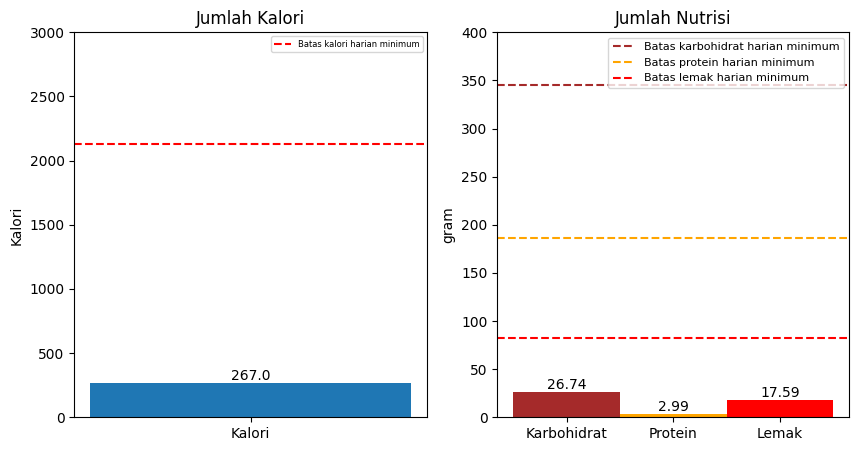

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(x,total_kalori, width=0.1)
plt.title("Jumlah Kalori")
plt.ylim(0,3000)
plt.axhline(y=bmr, color='red', linestyle='--', label='Batas kalori harian minimum')
plt.legend(fontsize=6)
plt.text(x,total_kalori, total_kalori, ha='center', va='bottom')
plt.ylabel('Kalori')

plt.subplot(1,2,2)
plt.bar(x1,total_karbo, width=1,  color='brown')
plt.text(x1,total_karbo, f"{total_karbo:.2f}", ha='center', va='bottom')
plt.bar(x2,total_protein, width=1, color='orange')
plt.text(x2,total_protein, f"{total_protein:.2f}", ha='center', va='bottom')
plt.bar(x3,total_lemak, width = 1, color='red')
plt.text(x3,total_lemak, total_lemak, ha='center', va='bottom')

req_nutrisi = int(input("Masukan batas nutrisi yang ingin dilihat(karbohidrat=1, protein=2, lemak=3, semua = 4)"))
if req_nutrisi == 1:
    plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
elif req_nutrisi ==2:
    plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
elif req_nutrisi == 3:
    plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')
elif req_nutrisi == 4:
    plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
    plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
    plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')



plt.title("Jumlah Nutrisi")
plt.ylim(0,400)
plt.legend(fontsize=8)
plt.ylabel("gram")



plt.show()

### Data untuk visualisasi harian

In [32]:
# Daftar kolom yang ingin ditambahkan
kolom_kosong = ['Hari', 'Tanggal', 'Bulan', 'Tahun', 'Waktu Makan', 'Kalori', 'Karbohidrat', 'Protein', 'Lemak']

# Buat DataFrame baru dengan kolom-kolom kosong
daily = pd.DataFrame(columns=kolom_kosong)


In [33]:
daily

,Hari,Tanggal,Bulan,Tahun,Waktu Makan,Kalori,Karbohidrat,Protein,Lemak


In [51]:
# Data baru yang ingin ditambahkan
new_data = {
    'Hari': ["Senin", "Senin", "Senin"], 
    'Tanggal': [2, 2, 2],
    'Bulan': [12,12, 12],
    'Tahun': [2024,2024, 2024],
    'Waktu Makan': ["Sarapan", "Makan Siang", "Makan Malam"],
    'Kalori': [90.0, 650.0, 1000.0],
    'Karbohidrat': [3.5, 52.0, 150.0],
    'Protein': [15.0, 8.0, 250.0],
    'Lemak': [2.0, 12.0, 50.0]
}
daily = pd.DataFrame(new_data)
daily


,Hari,Tanggal,Bulan,Tahun,Waktu Makan,Kalori,Karbohidrat,Protein,Lemak
0,Senin,2,12,2024,Sarapan,90.0,3.5,15.0,2.0
1,Senin,2,12,2024,Makan Siang,650.0,52.0,8.0,12.0
2,Senin,2,12,2024,Makan Malam,1000.0,150.0,250.0,50.0


In [169]:
Daily = pd.read_csv('D:\\S2\\Smt 1\\Metodologi Penelitian\\database\\Daily.csv')

Daily

,Hari,Tanggal,Bulan,Tahun,Waktu Makan,Kalori,Karbohidrat,Protein,Lemak
0,Senin,2,12,2024,Sarapan,90.0,3.5,15.0,2.0
1,Senin,2,12,2024,Makan Siang,650.0,52.0,8.0,12.0
2,Senin,2,12,2024,Makan Siang,1000.0,150.0,250.0,50.0
3,Senin,2,12,2024,Makan Malam,500.0,65.0,90.0,40.0
4,Senin,2,12,2024,Makan Malam,70.0,32.0,10.0,15.0
5,Selasa,3,12,2024,Sarapan,200.0,60.0,35.0,44.0
6,Selasa,3,12,2024,Makan Siang,90.0,10.0,10.0,25.0
7,Selasa,3,12,2024,Makan Malam,120.0,36.5,20.0,20.0
8,Rabu,4,12,2024,Sarapan,900.0,65.0,44.0,100.0
9,Rabu,4,12,2024,Makan Siang,1500.0,56.0,110.0,150.0


In [170]:
Daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hari         27 non-null     object 
 1   Tanggal      27 non-null     int64  
 2   Bulan        27 non-null     int64  
 3   Tahun        27 non-null     int64  
 4   Waktu Makan  27 non-null     object 
 5   Kalori       27 non-null     float64
 6   Karbohidrat  27 non-null     float64
 7   Protein      27 non-null     float64
 8   Lemak        27 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.0+ KB


Data Nutrisi Harian

In [171]:
grouped_hari = Daily.groupby('Hari')

# Konversi ke DataFrame dan reset indeks
Daily_grouped = grouped_hari.sum().reset_index()
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
Daily_grouped = Daily_grouped.set_index('Hari')
Daily_grouped = Daily_grouped.reindex(urutan_hari)

jumlah_kalori_rabu = Daily_grouped.loc['Rabu', 'Kalori']
print(jumlah_kalori_rabu)



Kalori_Harian = grouped_hari['Kalori'].sum()
Karbohidrat_Harian = grouped_hari['Karbohidrat'].sum()
Protein_Harian = grouped_hari['Protein'].sum()
Lemak_Harian = grouped_hari['Lemak'].sum()





3800.0


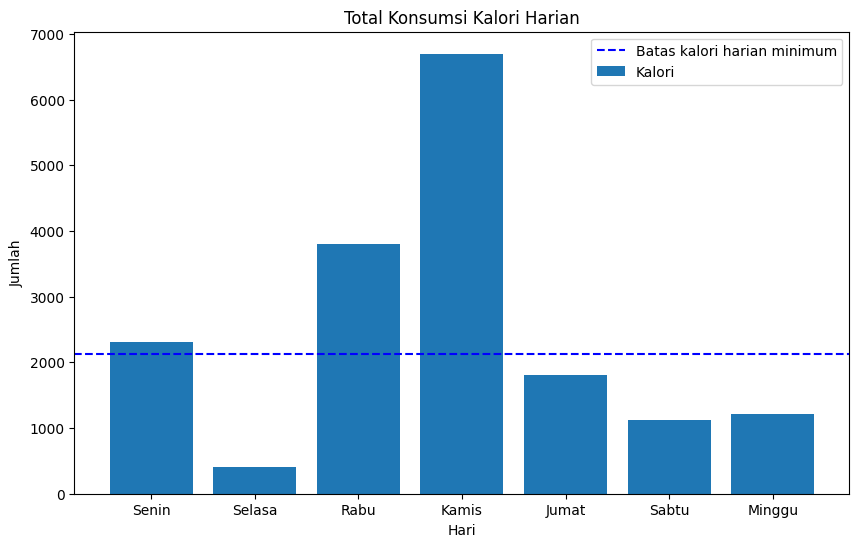

In [195]:
# Gabungkan data menjadi DataFrame
data_plot = pd.DataFrame({'Kalori': Kalori_Harian,
                          'Karbohidrat': Karbohidrat_Harian,
                          'Protein': Protein_Harian,
                          'Lemak': Lemak_Harian})

# Ubah DataFrame menjadi NumPy array
data_array = data_plot.to_numpy()

plt.figure(figsize=(10, 6))
# Buat grafik batang
plt.bar(Daily_grouped.index, Daily_grouped['Kalori'], label='Kalori')  # Mengambil kolom pertama (Kalori)
# ax = data_plot.plot(kind='bar', width=0.8)
plt.axhline(y=bmr, color='blue', linestyle='--', label='Batas kalori harian minimum')
plt.title('Total Konsumsi Kalori Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

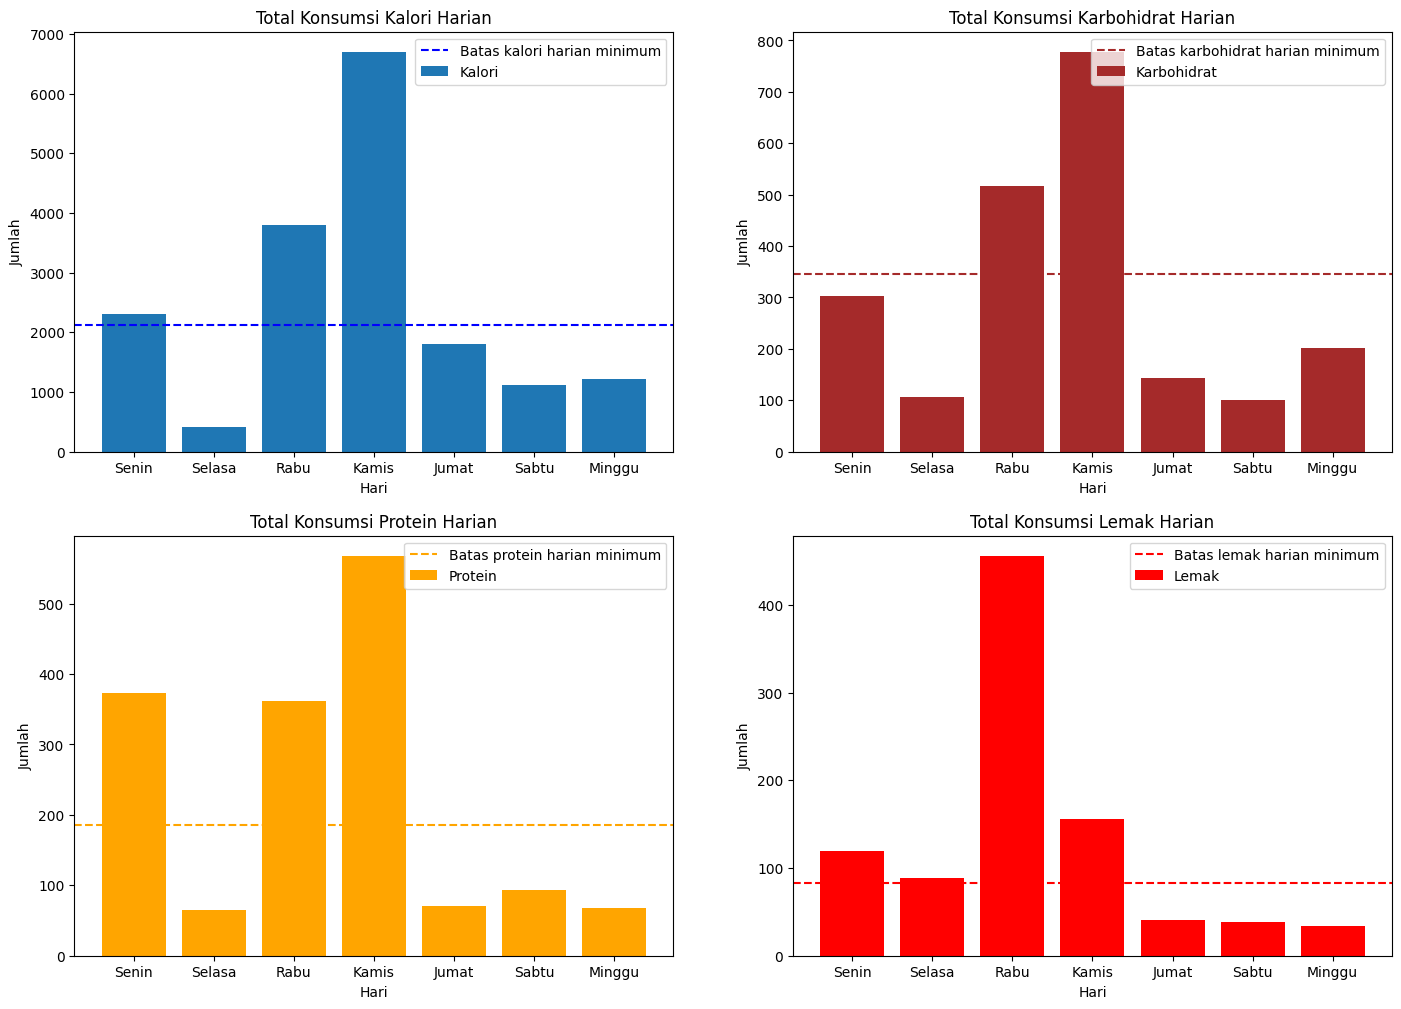

In [194]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)  # 1 baris, 2 kolom, subplot ke-1

plt.bar(Daily_grouped.index, Daily_grouped['Kalori'], label='Kalori')
plt.axhline(y=bmr, color='Blue', linestyle='--', label='Batas kalori harian minimum')
plt.title('Total Konsumsi Kalori Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend()

plt.subplot(2, 2, 2)  # 2 baris, 2 kolom, subplot ke-2

plt.bar(Daily_grouped.index, Daily_grouped['Karbohidrat'], label='Karbohidrat', color='brown')
plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
plt.title('Total Konsumsi Karbohidrat Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend()


plt.subplot(2, 2, 3)  # 2 baris, 2 kolom, subplot ke-3

plt.bar(Daily_grouped.index, Daily_grouped['Protein'], label='Protein', color='Orange')
plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
plt.title('Total Konsumsi Protein Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend()


plt.subplot(2, 2, 4)  # 2 baris, 2 kolom, subplot ke-4

plt.bar(Daily_grouped.index, Daily_grouped['Lemak'], label='Lemak', color='red')
plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')
plt.title('Total Konsumsi Lemak Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend()

plt.show

### Rekomendasi Makanan

In [173]:
jumlah_kalori_selasa = Daily_grouped.loc['Selasa', 'Kalori']
defisit_kalori = bmr - jumlah_kalori_selasa

print("kekurangan kalori hari ini", f"{defisit_kalori:.2f}", "kalori")


kekurangan kalori hari ini 1717.11 kalori


In [174]:
df.head()

,No,Nama_Makanan,Jenis_makanan,Size,Kalori,Lemak,Karbohidrat,Protein
0,1,Indomie goreng,Makanan,80.0,350.0,12.0,52.0,8.0
1,2,Pop Mie,Makanan,75.0,350.0,15.0,47.0,6.0
2,3,Chitato Lite,Snack,18.0,80.0,4.5,8.0,1.0
3,4,Qtela,Snack,20.0,100.0,5.0,14.0,0.0
4,5,Nissin Crispy Crackers,Snack,30.0,150.0,6.0,21.0,2.0


Sorting berdasarkan kalori

In [184]:
#Makanan
df_makanan = df[df['Jenis_makanan']=='Makanan']

#minuman
df_minuman = df[df['Jenis_makanan']=='Minuman']

#Snack
df_snack = df[df['Jenis_makanan']=='Snack']

# Urutkan DataFrame berdasarkan kolom 'Kalori' secara descending
makanan_sorted = df_makanan.sort_values(by='Kalori', ascending=False)
minuman_sorted = df_minuman.sort_values(by='Kalori', ascending=False)
snack_sorted = df_snack.sort_values(by= 'Kalori', ascending=False)

# Ambil 5 baris teratas
top_5_makanan = makanan_sorted[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(5)
top_5_minuman = minuman_sorted[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(5)
top_5_snack = snack_sorted[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(5)

# Ambil kolom 'Nama_Makanan' dari 5 baris teratas
#nama_makanan_teratas = top_5_makanan['Nama_Makanan']

print(top_5_makanan)
print("==============================================================")
print(top_5_minuman)
print("==============================================================")
print(top_5_snack)

             Nama_Makanan Jenis_makanan  Kalori
32               Mie Ayam       Makanan   421.0
1                 Pop Mie       Makanan   350.0
0          Indomie goreng       Makanan   350.0
33       Nasi Ayam Goreng       Makanan   329.0
31  Nasi Goreng Ayam Baso       Makanan   247.0
    Nama_Makanan Jenis_makanan  Kalori
20    Ultra Milk       Minuman   120.0
21       Buavita       Minuman   120.0
22  Pocari Sweat       Minuman   120.0
         Nama_Makanan Jenis_makanan  Kalori
16        Kacang Atom         Snack   533.0
24  French Fries 2000         Snack   270.0
28        Roma Kelapa         Snack   200.0
13        Sari Gandum         Snack   200.0
9        Silver Queen         Snack   170.0


Sorting berdasarkan kalori dan batas atas kekurangan kalori dari BMR

In [185]:
jumlah_kalori_hari_n = Daily_grouped.loc['Jumat', 'Kalori']
defisit_kalori = bmr - jumlah_kalori_hari_n

print("kekurangan kalori hari Jumat", f"{defisit_kalori:.2f}", "kalori")
print("==============================================================")

r1 = makanan_sorted[makanan_sorted['Kalori'] <= defisit_kalori]
r2 = minuman_sorted[minuman_sorted['Kalori'] <= defisit_kalori]
r3 = snack_sorted[snack_sorted['Kalori'] <= defisit_kalori]

rekomendasi_makanan = r1[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(3)
rekomendasi_minuman = r2[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(3)
rekomendasi_snack = r3[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(3)

print(rekomendasi_makanan)
print("==============================================================")
print(rekomendasi_minuman)
print("==============================================================")
print(rekomendasi_snack)


kekurangan kalori hari Jumat 317.11 kalori
             Nama_Makanan Jenis_makanan  Kalori
31  Nasi Goreng Ayam Baso       Makanan   247.0
19            Super bubur       Makanan   190.0
18        Koko Crunch Cup       Makanan   110.0
    Nama_Makanan Jenis_makanan  Kalori
20    Ultra Milk       Minuman   120.0
21       Buavita       Minuman   120.0
22  Pocari Sweat       Minuman   120.0
         Nama_Makanan Jenis_makanan  Kalori
24  French Fries 2000         Snack   270.0
28        Roma Kelapa         Snack   200.0
13        Sari Gandum         Snack   200.0
